#Multi-Class Text Classification with Scikit-Learn
## by Susan Li

https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/learning-stack/Colab-ML-Playbook/blob/master/NLP/Multi-Class%20Text%20Classification%20with%20Scikit-Learn/Consumer_complaints.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/learning-stack/Colab-ML-Playbook/blob/master/NLP/Multi-Class%20Text%20Classification%20with%20Scikit-Learn/Consumer_complaints.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [1]:
!wget https://data.consumerfinance.gov/api/views/s6ew-h6mp/rows.csv?accessType=DOWNLOAD

--2018-12-31 14:59:36--  https://data.consumerfinance.gov/api/views/s6ew-h6mp/rows.csv?accessType=DOWNLOAD
Resolving data.consumerfinance.gov (data.consumerfinance.gov)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.consumerfinance.gov (data.consumerfinance.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [      <=>           ] 644.82M  4.96MB/s    in 90s     

2018-12-31 15:01:09 (7.15 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [676147933]



In [23]:
import pandas as pd
df = pd.read_csv('rows.csv?accessType=DOWNLOAD', nrows=30000)
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,12/31/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,ALLY FINANCIAL INC.,MI,48708,NaN,NaN,Web,12/31/2018,In progress,Yes,NaN,3113150
1,12/29/2018,Debt collection,Other debt,Attempts to collect debt not owed,Debt was paid,NaN,NaN,"First Financial Resources, Inc.",MA,023XX,NaN,NaN,Web,12/29/2018,Closed with explanation,Yes,NaN,3112037
2,12/29/2018,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,Sequoia Financial Services,CA,90024,NaN,NaN,Web,12/29/2018,Closed with explanation,Yes,NaN,3112413
3,12/28/2018,Checking or savings account,CD (Certificate of Deposit),Managing an account,Deposits or withdrawals,NaN,NaN,ALLY FINANCIAL INC.,NY,10024,NaN,NaN,Referral,12/28/2018,In progress,Yes,NaN,3111837
4,12/28/2018,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company believes it acted appropriately as aut...,"Sequium Asset Solutions, LLC",TN,38111,NaN,Consent not provided,Web,12/28/2018,Closed with explanation,Yes,NaN,3111333


In [0]:
df = df[pd.notnull(df['Consumer complaint narrative'])]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5131 entries, 285 to 29997
Data columns (total 18 columns):
Date received                   5131 non-null object
Product                         5131 non-null object
Sub-product                     5131 non-null object
Issue                           5131 non-null object
Sub-issue                       4541 non-null object
Consumer complaint narrative    5131 non-null object
Company public response         5131 non-null object
Company                         5131 non-null object
State                           5101 non-null object
ZIP code                        3977 non-null object
Tags                            850 non-null object
Consumer consent provided?      5131 non-null object
Submitted via                   5131 non-null object
Date sent to company            5131 non-null object
Company response to consumer    5131 non-null object
Timely response?                5131 non-null object
Consumer disputed?              0 non-null 

In [0]:
col = ['Product', 'Consumer complaint narrative']
df = df[col]

In [27]:
df.columns

Index(['Product', 'Consumer complaint narrative'], dtype='object')

In [0]:
df.columns = ['Product', 'Consumer_complaint_narrative']

For this project, we need only two columns — “Product” and “Consumer complaint narrative”.

**Input**: Consumer_complaint_narrative

Example: “ I have outdated information on my credit report that I have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirements”

**Output**: product

Example: Credit reporting

We will remove missing values in “Consumer complaints narrative” column, and add a column encoding the product as an integer because categorical variables are often better represented by integers than strings.

We also create a couple of dictionaries for future use.

After cleaning up, this is the first five rows of the data we will be working on:

In [0]:
df['category_id'] = df['Product'].factorize()[0]
from io import StringIO
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [30]:
df.head()

,Product,Consumer_complaint_narrative,category_id
285,"Credit reporting, credit repair services, or o...",All dates on accounts are almost showing prese...,0
304,Debt collection,I am beyond exhausted with all my efforts to r...,1
408,Debt collection,"I checked my credit, but I never got any notif...",1
413,"Credit reporting, credit repair services, or o...",I would like to request a security freeze plac...,0
414,Debt collection,In XX/XX/XXXX LJ Ross Associates began contact...,1


## Imbalanced Classes
We see that the number of complaints per product is imbalanced. Consumers’ complaints are more biased towards Debt collection, Credit reporting and Mortgage.

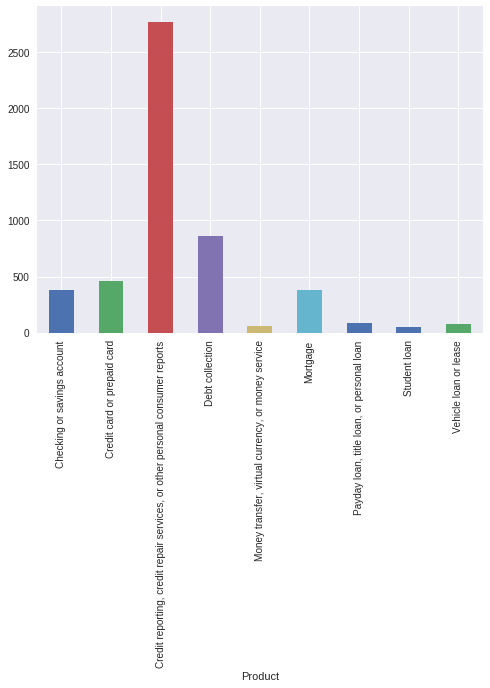

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

When we encounter such problems, we are bound to have difficulties solving them with standard algorithms. Conventional algorithms are often biased towards the majority class, not taking the data distribution into consideration. In the worst case, minority classes are treated as outliers and ignored. For some cases, such as fraud detection or cancer prediction, we would need to carefully configure our model or artificially balance the dataset, for example by undersampling or oversampling each class.

However, in our case of learning imbalanced data, the majority classes might be of our great interest. It is desirable to have a classifier that gives high prediction accuracy over the majority class, while maintaining reasonable accuracy for the minority classes. Therefore, we will leave it as it is.

## Text Representation
The classifiers and learning algorithms can not directly process the text documents in their original form, as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length. Therefore, during the preprocessing step, the texts are converted to a more manageable representation.

One common approach for extracting features from text is to use the bag of words model: a model where for each document, a complaint narrative in our case, the presence (and often the frequency) of words is taken into consideration, but the order in which they occur is ignored.

Specifically, for each term in our dataset, we will calculate a measure called Term Frequency, Inverse Document Frequency, abbreviated to tf-idf. We will use sklearn.feature_extraction.text.TfidfVectorizer to calculate a tf-idf vector for each of consumer complaint narratives:

* *sublinear_df* is set to *True* to use a logarithmic form for frequency.
* *min_df* is the minimum numbers of documents a word must be present in to be kept.
* *norm* is set to *l2*, to ensure all our feature vectors have a euclidian norm of 1.
* *ngram_range* is set to* (1, 2)* to indicate that we want to consider both unigrams and bigrams.
* *stop_words* is set to "*english*" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape

(5131, 14304)

Now, each of 5131 consumer complaint narratives is represented by 14304 features, representing the tf-idf score for different unigrams and bigrams.

We can use *sklearn.feature_selection.chi2* to find the terms that are the most correlated with each of the products:

In [33]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Checking or savings account':
  . Most correlated unigrams:
       . deposit
       . bonus
  . Most correlated bigrams:
       . savings account
       . checking account
# 'Credit card or prepaid card':
  . Most correlated unigrams:
       . citi
       . card
  . Most correlated bigrams:
       . believe payments
       . credit card
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
       . report
       . transunion
  . Most correlated bigrams:
       . report understanding
       . appear report
# 'Debt collection':
  . Most correlated unigrams:
       . collection
       . debt
  . Most correlated bigrams:
       . anguish slandering
       . collect debt
# 'Money transfer, virtual currency, or money service':
  . Most correlated unigrams:
       . wire
       . tickets
  . Most correlated bigrams:
       . wire transfer
       . bank wells
# 'Mortgage':
  . Most correlated unigrams:
       . escrow
       . mortga

## Multi-Class Classifier: Features and Design
* To train supervised classifiers, we first transformed the “Consumer complaint narrative” into a vector of numbers. We explored vector representations such as TF-IDF weighted vectors.
* After having this vector representations of the text we can train supervised classifiers to train unseen “Consumer complaint narrative” and predict the “product” on which they fall.

After all the above data transformation, now that we have all the features and labels, it is time to train the classifiers. There are a number of algorithms we can use for this type of problem.

Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant:

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

After fitting the training set, let’s make some predictions.

In [35]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [36]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [37]:
df[df['Consumer_complaint_narrative'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

,Product,Consumer_complaint_narrative,category_id


In [38]:
df[df['Consumer_complaint_narrative'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

,Product,Consumer_complaint_narrative,category_id


## Model Selection
We are now ready to experiment with different machine learning models, evaluate their accuracy and find the source of any potential issues.

We will benchmark the following four models:

* Logistic Regression
* (Multinomial) Naive Bayes
* Linear Support Vector Machine
* Random Forest

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


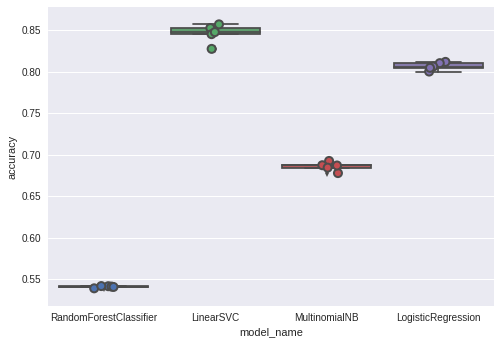

In [40]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [41]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.845829
LogisticRegression        0.806463
MultinomialNB             0.685641
RandomForestClassifier    0.540637
Name: accuracy, dtype: float64

## Model Evaluation
Continue with our best model (LinearSVC), we are going to look at the confusion matrix, and show the discrepancies between predicted and actual labels.

In [0]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

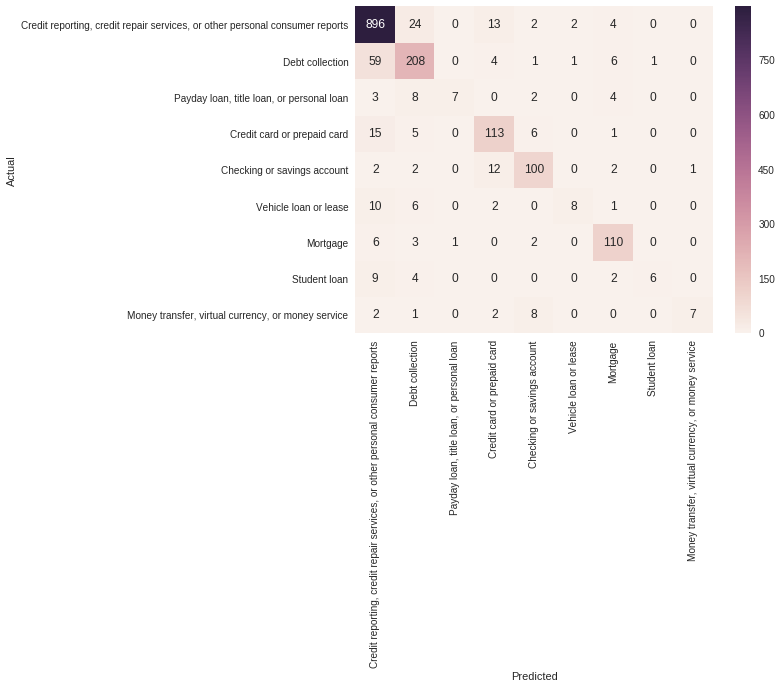

In [43]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The vast majority of the predictions end up on the diagonal (predicted label = actual label), where we want them to be. However, there are a number of misclassifications, and it might be interesting to see what those are caused by:

In [44]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

'Debt collection' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 59 examples.


,Product,Consumer_complaint_narrative
2777,Debt collection,This complaint is based on violations of the F...
20851,Debt collection,"The aforementioned account with XXXX, formerly..."
25082,Debt collection,TransUnion continues to report inaccurate info...
21545,Debt collection,XXXXXXXX XXXX XXXXXXXX has a charge off on my ...
8335,Debt collection,this company tried to contact me at my old con...
12190,Debt collection,I have been requesting validation since XXXX o...
15523,Debt collection,I have recently filed with the FTC and CFPB th...
20490,Debt collection,I have received a letter from XXXX XXXX XXXX. ...
19218,Debt collection,This fraudulent account has been previously re...
17460,Debt collection,XXXX XXXX is a small lending company that oper...



'Credit card or prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 15 examples.


,Product,Consumer_complaint_narrative
27562,Credit card or prepaid card,1. Alleged Name and Address of Creditor 2. Nam...
25958,Credit card or prepaid card,XXXX has been non-compliant with removing the...
19101,Credit card or prepaid card,This account is being illegally reported on my...
584,Credit card or prepaid card,I signed up for this card back in XXXX in stor...
26848,Credit card or prepaid card,Barclay 's Card has submitted hard inquiries w...
12559,Credit card or prepaid card,Pentagon Federal Credit Union was paid an amou...
10587,Credit card or prepaid card,"XXXX, XXXX, payments were made by XXXX from XX..."
12382,Credit card or prepaid card,XXXX has been non-compliant with removing the ...
28380,Credit card or prepaid card,This credit card account was supposed to be in...
9758,Credit card or prepaid card,THD/CBNA ON XX/XX/XXXX did a hard Inquiry that...



'Vehicle loan or lease' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 10 examples.


,Product,Consumer_complaint_narrative
8254,Vehicle loan or lease,Bank of the West performed a double withdrawal...
9266,Vehicle loan or lease,Requested payment extension to make my payment...
12214,Vehicle loan or lease,XX/XX/2016 Dispute 1 : slammed with GAP insura...
19249,Vehicle loan or lease,American Credit Acceptance report inaccurate p...
14461,Vehicle loan or lease,XXXX has been non-compliant with removing the ...
20935,Vehicle loan or lease,I have an issue with M & T bank I financed a v...
2514,Vehicle loan or lease,Experian removed XXXX auto loan account that ...
23996,Vehicle loan or lease,XXXX has been non-compliant with removing the...
8093,Vehicle loan or lease,XXXX has been non-compliant with removing the...
28315,Vehicle loan or lease,"On XX/XX/XXXX, applied for an auto loan but no..."



'Mortgage' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 6 examples.


,Product,Consumer_complaint_narrative
15505,Mortgage,When I began the process of purchasing my firs...
17088,Mortgage,"My name is XXXX XXXX XXXX, and recently I was ..."
22840,Mortgage,In XX/XX/XXXX and XX/XX/XXXX Freedom Mortgage ...
29108,Mortgage,Wells Fargo Home Mortgage transferred my mortg...
22313,Mortgage,We are trying to refinance the mortgage due to...
16174,Mortgage,"I submitted my basic information on XXXX XXXX,..."



'Student loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 9 examples.


,Product,Consumer_complaint_narrative
15433,Student loan,I had Citi Student loans. Some where transferr...
28581,Student loan,I have ad repeated issues with the collection ...
7658,Student loan,I am unemployed not recieving anymore unemploy...
15519,Student loan,Well In XX/XX/XXXX my loans went into default ...
14524,Student loan,Someone used my identity to ATTEND COLLEGE dis...
9741,Student loan,i have been trying to get my student loan out ...
23517,Student loan,The letters sent went to addresses that I no l...
23575,Student loan,on XXXX XXXX i received a dept collection lett...
27435,Student loan,XXXX XXXX ( XXXX ) XXXX Higher Education Servi...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Debt collection' : 24 examples.


,Product,Consumer_complaint_narrative
24737,"Credit reporting, credit repair services, or o...",I have sent 3 req asking for the validity of t...
3209,"Credit reporting, credit repair services, or o...",I have deep concerns over fraudulent practices...
18844,"Credit reporting, credit repair services, or o...","Between XX/XX/2018 and XX/XX/2018, a new accou..."
18015,"Credit reporting, credit repair services, or o...",Received communication from XXXX XXXX XXXX sta...
28884,"Credit reporting, credit repair services, or o...",I completed an online APPLICATION only - for a...
3700,"Credit reporting, credit repair services, or o...",my complaint is with XXXX XXXX XXXX company I...
22934,"Credit reporting, credit repair services, or o...",XXXX CONTINUES TO REPORT A BALANCE OF {$27000....
25595,"Credit reporting, credit repair services, or o...",As of XX/XX/2018 I paid for deletion of this a...
20629,"Credit reporting, credit repair services, or o...",Im having a problem with XXXX XXXX XXXX states...
29479,"Credit reporting, credit repair services, or o...",I noticed a negative account on my credit repo...



'Payday loan, title loan, or personal loan' predicted as 'Debt collection' : 8 examples.


,Product,Consumer_complaint_narrative
6673,"Payday loan, title loan, or personal loan",Notice of Fault and Opportunity to Cure and to...
3667,"Payday loan, title loan, or personal loan",I called in XX/XX/2018 and asked to have my ac...
27303,"Payday loan, title loan, or personal loan",On XX/XX/2018 I went to the bank to pull money...
8498,"Payday loan, title loan, or personal loan",I borrowed money from cashnetUSA on XX/XX/XXXX...
27424,"Payday loan, title loan, or personal loan",Called Sun Loan Company on XX/XX/2018 to speak...
7777,"Payday loan, title loan, or personal loan",I got a loan for {$1200.00} and every other we...
17198,"Payday loan, title loan, or personal loan",I told them not to contact me at work and the ...
26964,"Payday loan, title loan, or personal loan","XX/XX/XXXX ( XXXX XXXX, PST ) At all relevant ..."



'Vehicle loan or lease' predicted as 'Debt collection' : 6 examples.


,Product,Consumer_complaint_narrative
21632,Vehicle loan or lease,XX/XX/2018 XXXX from XXXX XXXX called a reside...
20459,Vehicle loan or lease,I requested a rewrite to lower my monthly paym...
22443,Vehicle loan or lease,"In XX/XX/2018, I notified Carvant Financial to..."
23843,Vehicle loan or lease,I filed bankruptcy in XX/XX/XXXX as a single f...
27598,Vehicle loan or lease,The amount owe is not the right amount The rig...
3625,Vehicle loan or lease,Due to unforeseen circumstances we requested a...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card or prepaid card' : 13 examples.


,Product,Consumer_complaint_narrative
23648,"Credit reporting, credit repair services, or o...",On XX/XX/2016 a credit card was opened in my n...
21202,"Credit reporting, credit repair services, or o...",My dispute is with Citi-Bank and XXXX XXXX. Du...
11669,"Credit reporting, credit repair services, or o...","On XX/XX/2016 my card was lost or stolen, so X..."
16161,"Credit reporting, credit repair services, or o...",I received an email saying that I miss a payme...
26586,"Credit reporting, credit repair services, or o...",Previous Complaint Number XXXX - was closed du...
28386,"Credit reporting, credit repair services, or o...",I was shocked when I reviewed my credit report...
16156,"Credit reporting, credit repair services, or o...","In the month of XX/XX/2018, while on a XXXX XX..."
16189,"Credit reporting, credit repair services, or o...",I received an email saying that I miss a payme...
28622,"Credit reporting, credit repair services, or o...",Citibank sent me a letter that they closed my ...
19144,"Credit reporting, credit repair services, or o...",I don't have a credit card with us bank and ne...



'Checking or savings account' predicted as 'Credit card or prepaid card' : 12 examples.


,Product,Consumer_complaint_narrative
23328,Checking or savings account,My card was used to withdrawal funds without m...
28623,Checking or savings account,"On XX/XX/2018, the NC department of revenue ( ..."
13262,Checking or savings account,On XX/XX/XXXX I made a purchase from XXXX XXXX...
20203,Checking or savings account,Citibank checking account ..I was hospitalized...
23533,Checking or savings account,"My wallet was stolen, reported to police, arre..."
13893,Checking or savings account,Dear CFPB i closed my account in XXXX with a X...
17549,Checking or savings account,On XX/XX/2018. I filed a fraud claim with citi...
26469,Checking or savings account,I called on XX/XX/XXXX and tried to resolve {$...
25444,Checking or savings account,On XX/XX/XXXX I went into a Bank of America Br...
29198,Checking or savings account,I opened an account with Usaa in XX/XX/2018. I...



'Credit card or prepaid card' predicted as 'Checking or savings account' : 6 examples.


,Product,Consumer_complaint_narrative
23535,Credit card or prepaid card,On XX/XX/2018 I reported my account ending in ...
28607,Credit card or prepaid card,On XX/XX/2018 I made deposits on two crises wi...
19026,Credit card or prepaid card,Dates of fraudulent transactions were for XXXX...
26246,Credit card or prepaid card,I had tried to submit a request for appeal and...
24221,Credit card or prepaid card,I did not receive my payroll direct deposit an...
21468,Credit card or prepaid card,"I am a "" Star Rewards '' cardholder with XXXX...."



'Money transfer, virtual currency, or money service' predicted as 'Checking or savings account' : 8 examples.


,Product,Consumer_complaint_narrative
9676,"Money transfer, virtual currency, or money ser...",I have been victim of banking fraud for both W...
8817,"Money transfer, virtual currency, or money ser...",This complaint is for Citibank. \n\nOn XX/XX/2...
28216,"Money transfer, virtual currency, or money ser...",I had {$1900.00} stolen from my Bank of Americ...
17984,"Money transfer, virtual currency, or money ser...","On XX/XX/XXXX, I made an international wire tr..."
24837,"Money transfer, virtual currency, or money ser...",Lady needing funds to settle and process fathe...
7893,"Money transfer, virtual currency, or money ser...","On the previous report, I stated TWO scenarios..."
27701,"Money transfer, virtual currency, or money ser...",The wire transfer was made with my account to ...
12873,"Money transfer, virtual currency, or money ser...","Last Friday, XX/XX/2018 I deposited a check in..."



'Debt collection' predicted as 'Mortgage' : 6 examples.


,Product,Consumer_complaint_narrative
9407,Debt collection,Background Information On XX/XX/XXXX my mortga...
6517,Debt collection,This is a follow-up complaint to CN # XXXX ; w...
12938,Debt collection,1- SPS has failed to provide proof by affidavi...
24642,Debt collection,I am cosigned on a loan with my son- he is mak...
8597,Debt collection,"On XX/XX/2018 at XXXX, I received a call from ..."
29127,Debt collection,I would like the CFPB to make me a spot check ...


As you can see, some of the misclassified complaints are complaints that touch on more than one subjects (for example, complaints involving both credit card and credit report). This sort of errors will always happen.

Again, we use the chi-squared test to find the terms that are the most correlated with each of the categories:

In [45]:
model.fit(features, labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [46]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Checking or savings account':
  . Top unigrams:
       . branch
       . bank
  . Top bigrams:
       . called bank
       . debit card
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . citi
  . Top bigrams:
       . balance transfer
       . credit card
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . experian
       . transunion
  . Top bigrams:
       . xxxx xxxx
       . victim identity
# 'Debt collection':
  . Top unigrams:
       . debt
       . collection
  . Top bigrams:
       . collect debt
       . debt owe
# 'Money transfer, virtual currency, or money service':
  . Top unigrams:
       . transfer
       . tickets
  . Top bigrams:
       . bank wells
       . sent xxxx
# 'Mortgage':
  . Top unigrams:
       . mortgage
       . home
  . Top bigrams:
       . loan servicing
       . freedom mortgage
# 'Payday loan, title loan, or personal loan':
  . Top unigrams:
       . loan
       . line


They are consistent within our expectation.

We can now test run with some samples and see what class it is belong to:

In [47]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"I requested a home loan modification through Bank of America. Bank of America never got back to me."
  - Predicted as: 'Mortgage'

"It has been difficult for me to find my past due balance. I missed a regular monthly payment"
  - Predicted as: 'Credit reporting, credit repair services, or other personal consumer reports'

"I can't get the money out of the country."
  - Predicted as: 'Credit reporting, credit repair services, or other personal consumer reports'

"I have no money to pay my tuition"
  - Predicted as: 'Mortgage'

"Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"
  - Predicted as: 'Checking or savings account'



Finally, we print out the classification report for each class:

In [48]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

Credit reporting, credit repair services, or other personal consumer reports       0.89      0.95      0.92       941
                                                             Debt collection       0.80      0.74      0.77       280
                                   Payday loan, title loan, or personal loan       0.88      0.29      0.44        24
                                                 Credit card or prepaid card       0.77      0.81      0.79       140
                                                 Checking or savings account       0.83      0.84      0.83       119
                                                       Vehicle loan or lease       0.73      0.30      0.42        27
                                                                    Mortgage       0.85      0.90      0.87       122
                                                       